In [2]:
%matplotlib inline
%load_ext rmagic
# %load_ext rpy2.ipython
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit

from IPython.display import display
from IPython.display import HTML

print 'import finished'

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic
import finished


# Week 3 - 4
Confidence interval estimator of coefficient is $\hat{\beta_j} \pm z_{1-a/2} \widehat{SE}(\hat{\beta_j})$,
where $\widehat{SE}(\hat{\beta_j}) = \sqrt{\widehat{Var}(\hat{\beta_j})} $

Confidence interval for the logit for a single subject:

- the estimated logit : $\hat{g}(x) = ln(\frac{\pi(x)} {1-\pi(x)}) = \sum_{j=0}^p \hat{\beta_j}x_j$

- the estimate of it's variable : $\widehat{Var}(\hat{g}(x)) =  x'[\widehat{Var}(\hat{\beta})]x$

- confidence interval of logit: $\hat{g}(x) \pm z_{1-a/2} \widehat{SE}(\hat{g}(x)) $

- confidence interval of estimated logistic probability: 
    $\frac{e^{\hat{g}(x) \pm z_{1-a/2} \widehat{SE}(\hat{g}(x))}} 
       {1 + e^{\hat{g}(x) \pm z_{1-a/2} \widehat{SE}(\hat{g}(x))}}$

`link function` - function of y that yields linear function of independent variable, linearlity allows the coefficient $\beta_1$ to indicate the change in dependent variable(y) corresponding to a unit change in the independent variable(x). In other words, **logit transformation** of y is linear to x.

- logistic regression's link function: $ln(\frac{\pi(x)} {1-\pi(x)}) = ln(e^{\beta_0 + \beta_1x}) = \beta_0 + \beta_1x$
- **$\Delta$ in logit for 1 unit $\Delta$ in x.** : $g(x+1) - g(x)= (\beta_0 + \beta_1x + \beta_1) - (\beta_0 + \beta_1x) = \beta_1$


- interpretation of $\beta_1$ depends on difference between above 2 logit and nature of independent variable x. (dichotomous, polychotomous, continuous, etc..)
    - Pr(y=1|x) = $\pi(x) = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$, Pr(y=0|x) =
$1 - \pi(x) = \frac{1}{1 + e^{\beta_0 + \beta_1x}}$
    - Dichotomous case: x is coded as 0, 1
        - consider cases of y=0,1 and x=0,1
        - the odds of outcome being present among exposed individuals(x=1):
            - $\frac{Pr(y=1|x=1)} {Pr(y=0|x=1)} = \frac{\pi(1)} {1-\pi(1)}$
            
        - for those not exposed individuals(x=0):
            - $\frac{Pr(y=1|x=0)} {Pr(y=0|x=0)} = \frac{\pi(0)} {1-\pi(0)}$
            
        - the `odds ratio, log odds ratio(logit difference)` is the ratio of odds (x=1) to odds (x=0)
            - OR = $\frac { \pi(1) \> / \> 1-\pi(1) } { \pi(0) \> / \> 1-\pi(0) } = e^{\beta_1}, \> ln(OR) = \beta_1$
            - Odds ratio is the odds the outcome **occurs** given **exposure** vs **non-exposure**.
            - [Difference between Odds Ratio and Likelihood Ratio](https://www.quora.com/How-can-I-remember-the-differences-between-odds-ratio-hazard-ratio-and-likelihood-ratio-and-in-what-instances-they-should-be-applied)
            - [More on odds ratio](http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm)
        - confidene interval estimation:
            - $ln(OR)$ is moren normally distributed than OR, thus is which confidence interval is based on.
            - $\widehat{Var}(\hat{\beta_1}) =  [\frac{1} {a} + \frac{1} {b} + \frac{1} {c} + \frac{1} {d} ]$
            - $\widehat{SE}(\hat{\beta_1}) = \sqrt{\widehat{Var}(\hat{\beta_1})} $, $\hat{\beta_1} \pm z_{1-a/2} \widehat{SE}(\hat{\beta_1})$
                        
    - Polychotomous case: a variable has 3 or more levels with a fixed number of outcomes
        - Referent Group: Primary comparison group when generating odds ratios in logistic regression. It is often the group with the lowest risk/odds of outcome
        - Referent Cell Coding: All design variables are coded as 0 for the referent group


### Exercise 1

In [15]:
myopia2 = pd.read_csv('./data/MYOPIA-fixed.csv')
lg2 = logit(formula = 'MYOPIC ~ SPHEQ', data=myopia2)
mresult2 = lg2.fit()
mresult2.summary()

Optimization terminated successfully.
         Current function value: 0.272933
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 MYOPIC   No. Observations:                  618
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.2973
Time:                        22:24:37   Log-Likelihood:                -168.67
converged:                       True   LL-Null:                       -240.04
                                        LLR p-value:                 6.727e-33
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0540      0.207      0.261      0.794        -0.351     0.459
SPHEQ         -3.8331      0.418     -9.162      0.000        -4.653    -3.013
==============================================================================
"""

#### exercise 1a
95% confidence that the actual SPHEQ coefficient lies between -4.653 and -3.013.
- $\hat{\beta_{SPHEQ}} \pm z_{1-a/2} \widehat{SE}(\hat{\beta_{SPHEQ}}) = -3.8331 \pm 1.96(0.418)$

#### exercise 1b
With SPHEQ = 2
- $\hat{g}(x) = \beta_0 + \beta_1x = 0.054 - 3.8331 * 2 = -7.6122$

Covariance Matrix(intercept, SPHEQ):
$\begin{bmatrix} 0.0427 & -0.0634 \\ -0.0634 & 0.1751 \end{bmatrix}$

$ \widehat{Var}(\hat{g}(x)) = x' [\widehat{Var}(\hat{\beta})] x = \begin{bmatrix} 1 & 2 \end{bmatrix} \begin{bmatrix} 0.0427 & -0.0634 \\ -0.0634 & 0.1751 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \end{bmatrix} = 0.4894, 
\widehat{SE}(\hat{\beta}) = 0.6996$

Logit 95% confidece interval:
- $\hat{g}(x) \pm z_{1-a/2} \widehat{SE}(\hat{g}(x)) = -7.6122 \pm 1.96(0.6996) \to [-8.9834, -6.2410]$

Estimated logistic probability:
- $\frac {e^{-7.6122}} {1 + e^{-7.6122}} = 0.00049414$

95% confidence interval for estimated logistic probability:
- $[ \frac {e^{-8.9834}} {1 + e^{-8.9834}}, \frac {e^{-6.2410}} {1 + e^{-6.2410}} ] = [0.0001254, 0.001944]$

The probability of having MYOPIA given SPHEQ=2 is 0.0494% with 95% confidence interval [0.01254%, 0.1944%]

### Exercise 2

In [16]:
icu = pd.read_csv('./data/icu.csv')
iculg2 = logit(formula = 'STA ~ AGE', data=icu)
icuresult = iculg2.fit()
icuresult.summary()

Optimization terminated successfully.
         Current function value: 0.480766
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.03924
Time:                        22:24:45   Log-Likelihood:                -96.153
converged:                       True   LL-Null:                       -100.08
                                        LLR p-value:                  0.005069
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.0585      0.696     -4.394      0.000        -4.423    -1.694
AGE            0.0275      0.011      2.607      0.009         0.007     0.048
==============================================================================
"""

#### exercise 2a
95% confidence that the actual AGE coefficient lies between 0.007 and 0.048.
- $\hat{\beta_{AGE}} \pm z_{1-a/2} \widehat{SE}(\hat{\beta_{AGE}}) = 0.0275 \pm 1.96(0.011)$

#### exercise 2b

With AGE = 60
- $\hat{g}(x) = \beta_0 + \beta_1x = -3.0585 + 0.0275 * 60 = -1.4085$

Covariance Matrix(intercept, AGE):
$\begin{bmatrix} 0.4846 & -0.007104 \\ -0.007104 & 0.000112 \end{bmatrix}$

$ \widehat{Var}(\hat{g}(x)) = x' [\widehat{Var}(\hat{\beta})] x = \begin{bmatrix} 1 & 60 \end{bmatrix} \begin{bmatrix} 0.4846 & -0.007104 \\ -0.007104 & 0.000112 \end{bmatrix} \begin{bmatrix} 1 \\ 60 \end{bmatrix} = 0.03394, 
\widehat{SE}(\hat{\beta}) = 0.1842$

Logit 95% confidece interval:
- $\hat{g}(x) \pm z_{1-a/2} \widehat{SE}(\hat{g}(x)) = -1.4085 \pm 1.96(0.1842) \to [-1.7695, -1.0475]$

Estimated logistic probability:
- $\frac {e^{-1.4085}} {1 + e^{-1.4085}} = 0.1965$

95% confidence interval for estimated logistic probability:
- $[ \frac {e^{-1.7695}} {1 + e^{-1.7695}}, \frac {e^{-1.0475}} {1 + e^{-1.0475}} ] = [0.1456, 0.2597]$

The probability of having STA given AGE=60 is 19.65% with 95% confidence interval [14.56%, 25.97%]

In [17]:
covm = icuresult.cov_params()
print covm
print math.exp(-1.4085) / (1+math.exp(-1.4085))
print math.exp(-1.7695) / (1+math.exp(-1.7695))
print math.exp(-1.0475) / (1+math.exp(-1.0475))
var = np.array([1,60]).T.dot(icuresult.cov_params()).dot(np.array([1,60]))
print var, math.sqrt(var)

           Intercept       AGE
Intercept   0.484586 -0.007104
AGE        -0.007104  0.000112
0.196470753549
0.145604519837
0.259705458333
0.0339372225345 0.184220581192


### Exercise 3

In [19]:
icu = pd.read_csv('./data/icu.csv')
icu['RACE2'] = (icu['RACE'] == 2).astype(int)
icu['RACE3'] = (icu['RACE'] == 3).astype(int)
# iculg = logit(formula = 'STA ~ AGE + CAN + CPR + INF + RACE2 + RACE3', data=icu)
# icuresult = iculg.fit()
# display(icuresult.summary())
# CALLING LOGITSTIC REGRESSION THROUGH R BECAUSE FOR SOME REASON STATSMODEL'S LOGIT DOESN'T TAKE INF PARAM.
%R -i icu print(summary(glm(STA ~ AGE + CAN + CPR + INF + RACE2 + RACE3, data=icu, family=binomial())))

ERROR: Line magic function `%R` not found.


#### exercise 3a

Coding Design Variable for RACE(1 2 3), need 2 dummy variables to represent 3 RACE groups.

RACE | Label | Race2 | Race3
-|-|:-:|:-:
1 | White | 0 | 0
2 | Black | 1 | 0
3 | Other | 0 | 1


#### exercise 3b

Logistic regression model of STA on AGE, CAN, CPR, INF, and RACE
- **logistic regression model** : $\pi(x) = \frac{e^{\beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}}} {1 + e^{\beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}}}$, 
$1 - \pi(x) = \frac{1}{1 + e^{\beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}}}$
- **logit transformation** : $g(x) = ln(\frac{\pi(x)} {1-\pi(x)}) = ln(e^{\beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}}) = \beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}$

#### exercise 3c

- **likelihood function** : $\xi(x_i) = \Pi_{i=1}^n \xi(x_i) = \Pi_{i=1}^n \pi(x_i)^{y_i}[1-\pi(x_i)]^{1-y_i}]$
    - Xs = {AGE, CAN, CPR, INF, RACE1, RACE2}, 6 variables and 7 different likelihood equations. (y=1 for STA, y=0 for not)

- **log likelihood function** : $ln(\xi(x_i)) = \sum_{i=1}^n [ y_i ln(\pi(x_i)) + (1-y_i) ln(1-\pi(x_i))] $

#### exercise 3d

- **logistic regression model** : $\pi(x) = \frac{e^{-3.51152 + 0.02712*{AGE} + 0.24451*{CAN} + 1.64650*{CPR} + 0.68067*{INF} -0.95708*{RACE2} + 0.25975*{RACE3}}} {1 + e^{-3.51152 + 0.02712*{AGE} + 0.24451*{CAN} + 1.64650*{CPR} + 0.68067*{INF} -0.95708*{RACE2} + 0.25975*{RACE3}}}$
- **logit transformation** : $g(x) = -3.51152 + 0.02712*{AGE} + 0.24451*{CAN} + 1.64650*{CPR} + 0.68067*{INF} -0.95708*{RACE2} + 0.25975*{RACE3}$

### Exercise 4

In [20]:
hypo = pd.read_csv('./data/hyponatremia.csv')
hypolg = logit(formula='nas135 ~ female', data=hypo)
hresult = hypolg.fit()
display(hresult.summary())
runlg = logit(formula='nas135 ~ runtime', data=hypo)
display(runlg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.360585
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  488
Model:                          Logit   Df Residuals:                      486
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.05293
Time:                        22:25:04   Log-Likelihood:                -175.97
converged:                       True   LL-Null:                       -185.80
                                        LLR p-value:                 9.204e-06
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.4749      0.208    -11.884      0.000        -2.883    -2.067
female         1.2260      0.280      4.386      0.000         0.678     1.774
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.351723
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  477
Model:                          Logit   Df Residuals:                      475
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.07025
Time:                        22:25:04   Log-Likelihood:                -167.77
converged:                       True   LL-Null:                       -180.45
                                        LLR p-value:                 4.777e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5926      0.771     -7.251      0.000        -7.104    -4.081
runtime        0.0155      0.003      5.015      0.000         0.009     0.022
==============================================================================
"""

#### exercise 4a

$\beta_0 = -2.4749, \beta_{female} = 1.2260, \> e^{1.2260} = 3.41 \Rightarrow$ 
   - the (odds/log odds) of nas135 is (3.41%/1.22) times for female of that of male.

#### exercise 4b

$\beta_{runtime} = 0.0155, \> e^{0.0155} = 1.0156 \Rightarrow$ 
   - the (odds/log odds) of nas135 increases by (1.0156%/0.0155) for every unit increase of runtime. 
   
#### exercise 4c
   - the `odds ratio` is the ratio of odds (nas135 y=1,0 | runtime x=1) to odds (nas135 y=1,0 | runtime x=0) (or odd increase of dependent for every unit increase of independent)
       - OR = $\frac { \pi(1) \> / \> 1-\pi(1) } { \pi(0) \> / \> 1-\pi(0) } = e^{\beta_1} = e^{0.0155} = 1.0156 \>$
       - For every increase in runtime, the odds of nas136 increases by 1.0156%.
    
#### exercise 4d
   - the -5.5926 is the log odds of nas136 of runner finishing marathon with 0 minute. This is impossible. The btter way would be to normalize runtime around it's average so the defualt intercept will correspond to runner of average finishing time.

#### exercise 4e
Odds ratio for runtime difference of 2 hours(120 minutes).
   - OR = $e^{0.0155*120} = 6.42$
   - 95% confidece interval: $[e^{0.009*120}, e^{0.022*120}] = [2.94, 14.01]$

In [21]:
hyporf = logit(formula='nas135 ~ female + runtime', data=hypo)
display(hyporf.fit().summary())

Optimization terminated successfully.
         Current function value: 0.340125
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  477
Model:                          Logit   Df Residuals:                      474
Method:                           MLE   Df Model:                            2
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.1009
Time:                        22:25:08   Log-Likelihood:                -162.24
converged:                       True   LL-Null:                       -180.45
                                        LLR p-value:                 1.237e-08
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.7211      0.823     -6.949      0.000        -7.335    -4.107
female         0.9638      0.291      3.312      0.001         0.393     1.534
runtime        0.0142      0.003      4.314      0.000         0.008     0.021
==============================================================================
"""

#### exercise 4f
   - $\beta_{female} = 0.9638, \beta_{runtime} = 0.0142$
   - Log odds of nas135 for female runner is 0.9638 times that of male's.
   - Log odds of nas135 increases by 0.0142 for every minute increase of runtime.
   
#### exercise 4g
   - Compared to coefficient of the female only model, $\beta_{female}$ decreases by 21.39% (1.2260 to 0.9638)
   
#### exercise 4h
   - Odds ratio of hyponatremia for female vs male: $e^{\beta_1} = e^{0.9638} = 2.62 \>$

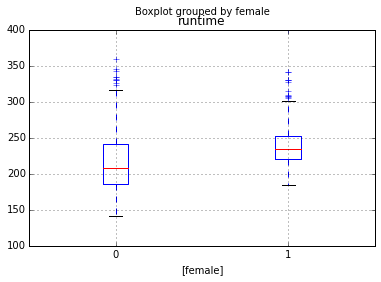

In [22]:
subdf = pd.DataFrame(columns=['runtime','female'])
subdf['runtime'] = hypo.runtime
subdf['female'] = hypo.female
subdf.boxplot(by='female')

#### exercise 4i
   - there is a positive association between `female` and `runtime` factor since `female` coefficient decreased upon introduction of `runtime` factor. Also becasue `female` coefficient changed(decreased) by almost 21%, and `runtime` also having positive relationship with `nas135`, we can conclude that `runtime` is a confounding factor here.

In [24]:
### exercise 4i
hypo = pd.read_csv('./data/hyponatremia.csv')
ilg = logit(formula='nas135 ~ female*runtime', data=hypo)
iresult = ilg.fit()
display(iresult.summary())

Optimization terminated successfully.
         Current function value: 0.339935
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  477
Model:                          Logit   Df Residuals:                      473
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.1014
Time:                        22:25:19   Log-Likelihood:                -162.15
converged:                       True   LL-Null:                       -180.45
                                        LLR p-value:                 5.597e-08
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -6.0067      1.068     -5.626      0.000        -8.099    -3.914
female             1.6644      1.666      0.999      0.318        -1.601     4.930
runtime            0.0154      0.004      3.581      0.000         0.007     0.024
female:runtime    -0.0028      0.007     -0.427      0.669        -0.016     0.010
==================================================================================
"""

#### exercise 4j: assess interaction between `female` and `runtime`
   - interaction `female vs runtime` of -0.0028 has p-value of non-significant 0.669 > (0.05 95%), thus no interactions.

In [25]:
### exercise 4j
hypo = pd.read_csv('./data/hyponatremia.csv')
ilg = logit(formula='nas135 ~ female*runtime', data=hypo)
iresult = ilg.fit()
display(iresult.summary())

Optimization terminated successfully.
         Current function value: 0.339935
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  477
Model:                          Logit   Df Residuals:                      473
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.1014
Time:                        22:25:26   Log-Likelihood:                -162.15
converged:                       True   LL-Null:                       -180.45
                                        LLR p-value:                 5.597e-08
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -6.0067      1.068     -5.626      0.000        -8.099    -3.914
female             1.6644      1.666      0.999      0.318        -1.601     4.930
runtime            0.0154      0.004      3.581      0.000         0.007     0.024
female:runtime    -0.0028      0.007     -0.427      0.669        -0.016     0.010
==================================================================================
"""

#### exercise 4k: introduce variable `wtidiff(1 or 0)` to the model.
   - interaction of `female` vs `wgain` of -1.0959 has p-value of 0.074, this could be deemed either way depending on the confidence interval. (0.074 > 0.1 90% confidence interval thus significant)

In [26]:
### exercise 4j
hypo = pd.read_csv('./data/hyponatremia.csv')
hypo['wgain'] = hypo['wtdiff'].map(lambda x: 0 if x <= 0 or np.isnan(x) else 1)
klg = logit(formula='nas135 ~ female*wgain + runtime', data=hypo)
kresult = klg.fit()
display(kresult.summary())

Optimization terminated successfully.
         Current function value: 0.308133
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  477
Model:                          Logit   Df Residuals:                      472
Method:                           MLE   Df Model:                            4
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.1855
Time:                        22:25:33   Log-Likelihood:                -146.98
converged:                       True   LL-Null:                       -180.45
                                        LLR p-value:                 1.005e-13
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -6.7655      0.964     -7.020      0.000        -8.654    -4.877
female           1.4143      0.465      3.039      0.002         0.502     2.326
wgain            2.1553      0.464      4.648      0.000         1.246     3.064
female:wgain    -1.0959      0.614     -1.785      0.074        -2.299     0.107
runtime          0.0147      0.004      4.066      0.000         0.008     0.022
================================================================================
"""

#### exercise 4l: odds ratio of `nas135` on `wgain` for male / female.
   - **logit**: $\beta_0 + \beta_{1female} + \beta_{2wgain} + \beta_{3female*wgain} + \beta_{4runtime}$
   - for male(wgain(1,0), female(0)): $(\beta_0 + \beta_2 + \beta_4) - (\beta_0 + \beta_4) = \beta_2 \Rightarrow e^{\beta_2=2.1553} = 8.63$
       - for males, odds of `nas135` is 8.63 times greater who gained weights vs not gained weights
   - for female(wgain(1,0), female(1)): $(\beta_0 + \beta_1 + \beta_2 + \beta_3 + \beta_4) - (\beta_0 + \beta_1 + \beta_4) = \beta_2 + \beta_3 = 2.1533 - 1.0959 = 2.88$
       - for females, odds of `nas135` is 2.88 times greater who gained weights vs not gained weights
   - **logit transformation** : $g(x) = ln(\frac{\pi(x)} {1-\pi(x)}) = ln(e^{\beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}}) = \beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}$


#### exercise 4l
   - there is a positive association between `female` and `runtime` factor since `female` coefficient decreased upon introduction of `runtime` factor. Also becasue `female` coefficient changed(decreased) by almost 21%, and `runtime` also having positive relationship with `nas135`, we can conclude that `runtime` is a confounding factor here.

In [27]:
### exercise 4m
hypo = pd.read_csv('./data/hyponatremia.csv')
hypo['wgain'] = hypo['wtdiff'].map(lambda x: 0 if x <= 0 else 1)
hypo.fillna(0, inplace=True)
# display(hypo)
lg1 = logit(formula='nas135 ~ female + runtime', data=hypo)
display(lg1.fit().summary())
lg2 = logit(formula='nas135 ~ female + runtime + wgain + urinat3p + bmi', data=hypo)
display(lg2.fit().summary())

Optimization terminated successfully.
         Current function value: 0.349614
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  488
Model:                          Logit   Df Residuals:                      485
Method:                           MLE   Df Model:                            2
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.08175
Time:                        22:25:38   Log-Likelihood:                -170.61
converged:                       True   LL-Null:                       -185.80
                                        LLR p-value:                 2.533e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.6055      0.744     -6.193      0.000        -6.063    -3.148
female         1.0834      0.285      3.795      0.000         0.524     1.643
runtime        0.0095      0.003      3.104      0.002         0.004     0.016
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.310751
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  488
Model:                          Logit   Df Residuals:                      482
Method:                           MLE   Df Model:                            5
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.1838
Time:                        22:25:38   Log-Likelihood:                -151.65
converged:                       True   LL-Null:                       -185.80
                                        LLR p-value:                 2.305e-13
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.0762      0.967     -6.286      0.000        -7.971    -4.181
female         1.1366      0.315      3.607      0.000         0.519     1.754
runtime        0.0080      0.003      2.466      0.014         0.002     0.014
wgain          1.7475      0.313      5.580      0.000         1.134     2.361
urinat3p       0.8557      0.523      1.637      0.102        -0.169     1.880
bmi            0.0400      0.032      1.266      0.206        -0.022     0.102
==============================================================================
"""

#### exercise 4m: likelihood ratio test for models: `female runtime` vs `female runtime wgain urinat3p bmi`.
   - difference in # of features is 3 (degrees of freedom)
   - likelihood ratio test??